# Stability Analysis of oUSD coin

In [1]:
import os, sys
import requests
import pandas as pd
import numpy as np
from datetime import timedelta as td, datetime as dt, timezone
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

# Scripts
scripts_module_path = os.path.abspath(os.path.join(os.getcwd(),'..', 'scripts'))
if scripts_module_path not in sys.path:
    sys.path.append(scripts_module_path)
from acquisition import Acquisition as Akw
from handling import getDataFrame, addReversionAndVolatility, addAverages
from viz import createBasicAnalysisPlot

In [2]:
# common keywords
basic_kwargs = dict(granularity='days')

# required for data acquisition
acquisition_kwargs = dict(**basic_kwargs,
                          datetime_from=dt.now() - td(days=523),
                          datetime_till=dt.now(),
                          downloadIfMissing=True,
                          includeOffPeg=True)
# required for the estimation of the reversion rate
reversion_kwargs = dict(**basic_kwargs,
                        windowSize=85,
                        minDataPoints=60,
                        discount_factor = 0.1,
                        sampleError=0.0001,
                        verbose=True)

## Reversion rate of oUSD

In [3]:
ousd = getDataFrame(whichData="cg_ousd_usd", **acquisition_kwargs)
ousd_df = addReversionAndVolatility(ousd, **reversion_kwargs)
addAverages(ousd_df, columns=["price", "rate", "sigma"], com=5, inplace=True)

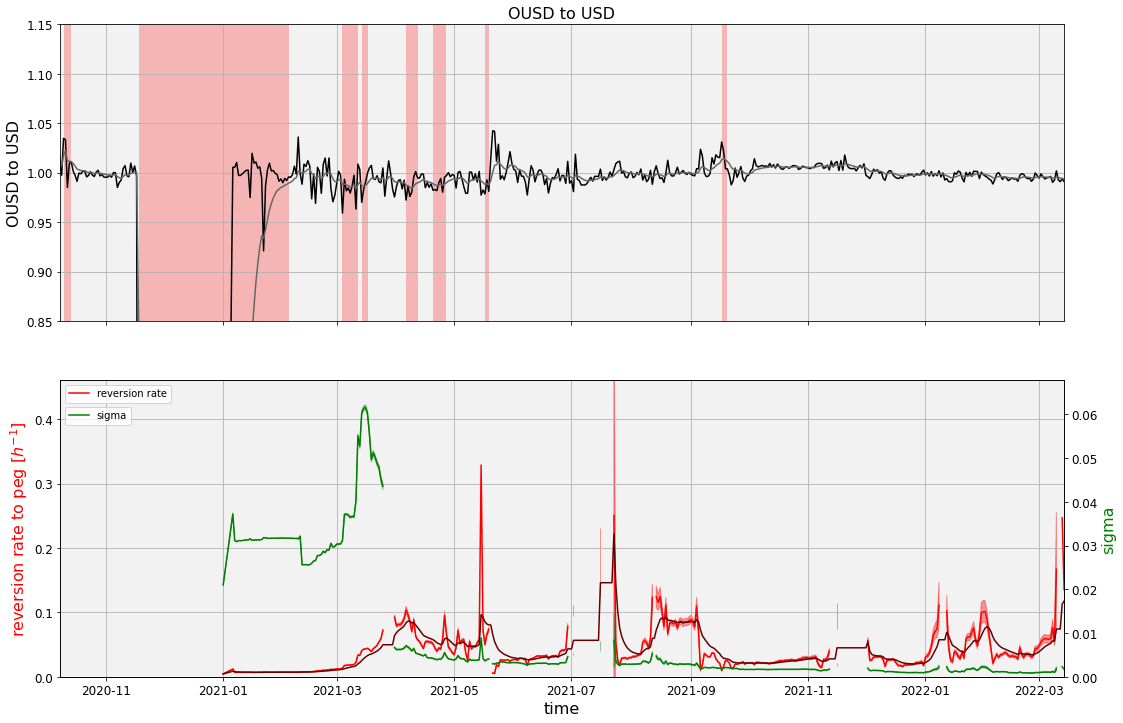

In [7]:
fig, axes, secax = createBasicAnalysisPlot(df=ousd_df, title="OUSD to USD", price_dev=0.08)
axes[0].plot(ousd_df.date, ousd_df.price_ewm, color="#666")
axes[1].set_ylim([0,ousd_df.rate.max()*(1+0.4)])
secax[1].set_ylim([0,ousd_df.sigma.max()*(1+0.1)])
axes[1].plot(ousd_df.date, ousd_df.rate_ewm, color="#600")
axes[0].set_ylim([0.85,1.15])
axes[0].fill_between(ousd_df["date"], 0.8, 1.15, 
                where=(ousd_df.price_ewm>1.01) | (ousd_df.price_ewm<0.99),
                facecolor='red',
                alpha=0.25)
plt.show()

The first figure shows the price of `Origin USD (oSDN)` against `USD` as recorded by coingecko. The grey line shows an exponentially weighted moving average. There is one region, where the coingecko records for oUSD show a value of about 0.2 USD over the period of 7 weeks during December 2020 and January 2021. After that the volatility has continued to go down. Throughout the fall of 2021 `oUSD` has traded on average slightly above the USD, but since the beginning of this year the peg seems to hold quite well. 

The second figure shows that the wild price action with comparitively high volatility (`green`) in the beginning of 2021 until early summer have now become more bounded and pretty much decreased since then. On the other hand the reverting rate (`red`) has dropped below 0.05 for most parts of fall 2021, which agrees with the visual inspection that the `oUSD` coin traded consistently above the peg. Only in the beginning of 2022 did the peg restore gradually. 